<a href="https://colab.research.google.com/github/GusBarcenac/Simulacion2-Examen-1/blob/main/financieras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Árbol de precio y opciones
import numpy as np
# Definiciones de funciones para el modelo binomial
def calcular_factores(volatilidad, tasa, dt):
  u = np.exp(volatilidad * np.sqrt(dt))
  d = 1 / u
  p = (np.exp(tasa * dt) - d) / (u - d)
  return u, d, p

def construir_arbol_precios(precio_spot, u, d, n):
  arbol_precios = np.zeros((n + 1, n + 1))
  for i in range(n + 1):
    for j in range(i + 1):
      arbol_precios[j, i] = precio_spot * (u ** (i - j)) *(d ** j)
  return arbol_precios

def calcular_payoff(arbol, precio_ejercicio, tipo):
  if tipo == 'call':
    return np.maximum(0, arbol - precio_ejercicio)
  else:
    return np.maximum(0, precio_ejercicio - arbol)

def arbol_payoffs(arbol_precios, precio_ejercicio, tipo,es_americana, tasa_libre_riesgo, delta_t, p):
  n = arbol_precios.shape[1] - 1
  arbol_opciones = np.zeros_like(arbol_precios)
  arbol_opciones[:, n] = calcular_payoff(arbol_precios[:, n],precio_ejercicio, tipo)

  for i in range(n - 1, -1, -1):
      for j in range(i + 1):
          valor_continuacion = np.exp(-tasa_libre_riesgo * delta_t) * (p * arbol_opciones[j, i + 1] + (1 - p) * arbol_opciones[j + 1, i + 1])

          payoff_inmediato = calcular_payoff(arbol_precios[j,i], precio_ejercicio, tipo)
          if es_americana:
              arbol_opciones[j, i] = max(payoff_inmediato,valor_continuacion)
          else:
              arbol_opciones[j, i] = valor_continuacion
  return arbol_opciones


def imprimir_arbol_combinado(arbol_precios, arbol_opciones):
    n = arbol_precios.shape[1]
    for i in range(n):
        for j in range(i + 1):
            print(f"Nodo ({i},{j}) - Precio: {arbol_precios[j,i]:.2f}, Payoff: {arbol_opciones[j, i]:.2f}", end=" | ")
        print("\n")



In [12]:
# Parámetros del modelo
precio_spot = 178 # Precio actual del activo
precio_ejercicio = 185 # Precio de ejercicio de la opción
volatilidad = 0.34 # Volatilidad anual del activo
tasa_libre_riesgo = 0.12 # Tasa de interés libre de riesgo anual
periodos = 7 # Número de periodos en el modelo binomial
tiempo = 4 / 12 # Tiempo hasta el vencimiento en años


# Tipo de opción ('call' o 'put') y si es americana (True o False)
tipo_opcion = 'call' # 'call' para call, 'put' para put
es_americana = True # True para opción americana, False para europea

# Calcular factores del modelo binomial
delta_t = tiempo / periodos
u, d, p = calcular_factores(volatilidad, tasa_libre_riesgo,delta_t)

# Construir el árbol de precios
arbol_precios = construir_arbol_precios(precio_spot, u, d,periodos)

# Obtener el árbol de payoffs
arbol_opciones = arbol_payoffs(arbol_precios, precio_ejercicio,
tipo_opcion, es_americana, tasa_libre_riesgo, delta_t, p)

# Imprimir el árbol combinado de precios y payoffs
print("Árbol Combinado de Precios y Payoffs:")
imprimir_arbol_combinado(arbol_precios, arbol_opciones)

#Imprimr valores calculados (aparecen en la imagen del proyecto)
print ("El valor de u es:",u)
print ("El valor de d es",d)
print ("El valor de p es",p)


Árbol Combinado de Precios y Payoffs:
Nodo (0,0) - Precio: 178.00, Payoff: 14.22 | 

Nodo (1,0) - Precio: 191.71, Payoff: 21.05 | Nodo (1,1) - Precio: 165.27, Payoff: 6.99 | 

Nodo (2,0) - Precio: 206.47, Payoff: 30.38 | Nodo (2,1) - Precio: 178.00, Payoff: 11.18 | Nodo (2,2) - Precio: 153.45, Payoff: 2.53 | 

Nodo (3,0) - Precio: 222.38, Payoff: 42.58 | Nodo (3,1) - Precio: 191.71, Payoff: 17.53 | Nodo (3,2) - Precio: 165.27, Payoff: 4.44 | Nodo (3,3) - Precio: 142.48, Payoff: 0.48 | 

Nodo (4,0) - Precio: 239.50, Payoff: 57.65 | Nodo (4,1) - Precio: 206.47, Payoff: 26.76 | Nodo (4,2) - Precio: 178.00, Payoff: 7.74 | Nodo (4,3) - Precio: 153.45, Payoff: 0.93 | Nodo (4,4) - Precio: 132.29, Payoff: 0.00 | 

Nodo (5,0) - Precio: 257.95, Payoff: 75.05 | Nodo (5,1) - Precio: 222.38, Payoff: 39.48 | Nodo (5,2) - Precio: 191.71, Payoff: 13.30 | Nodo (5,3) - Precio: 165.27, Payoff: 1.79 | Nodo (5,4) - Precio: 142.48, Payoff: 0.00 | Nodo (5,5) - Precio: 122.83, Payoff: 0.00 | 

Nodo (6,0) - Pr

In [3]:
#Modelo binomial con volatilidad
import numpy as np

# Definir las funciones necesarias para el modelo binomial
def calcular_factores(volatilidad, tasa, dt):
  u = np.exp(volatilidad * np.sqrt(dt))
  d = 1 / u
  p = (np.exp(tasa * dt) - d) / (u - d)
  return u, d, p

def construir_arbol_precios(precio_spot, u, d, periodos):
  arbol = np.zeros((periodos + 1, periodos + 1))
  for i in range(periodos + 1):
    for j in range(i + 1):
      arbol[j, i] = precio_spot * (u ** (i - j)) * (d ** j)
  return arbol


def calcular_payoff(arbol, precio_ejercicio, tipo):
  if tipo == 'call':
    return np.maximum(0, arbol - precio_ejercicio)
  else:
    return np.maximum(0, precio_ejercicio - arbol)


def valorar_opcion_binomial(arbol, tasa, dt, p, precio_ejercicio, tipo,es_americana):
  payoff = calcular_payoff(arbol[:, -1], precio_ejercicio, tipo)
  for i in range(arbol.shape[1] - 2, -1, -1):
    for j in range(i + 1):
      valor_continuacion = np.exp(-tasa * dt) * (p * payoff[j] + (1 - p) * payoff[j + 1])

      payoff[j] = valor_continuacion
      if es_americana:
        payoff_inmediato = calcular_payoff(arbol[j, i], precio_ejercicio, tipo)
        payoff[j] = np.maximum(payoff[j], payoff_inmediato)
  return payoff[0]

In [4]:
# Parámetros del modelo
precio_spot = 178 # Precio actual del activo
precio_ejercicio = 185 # Precio de ejercicio de la opción
volatilidad = 0.34 # Volatilidad anual del activo (en decimales)
tasa_libre_riesgo = 0.12 # Tasa de interés libre de riesgo anual (en decimales)
periodos = 7 # Número de periodos en el modelo binomial
tiempo = 4 / 12 # Tiempo hasta el vencimiento en años

# Calcular factores del modelo binomial
delta_t = tiempo / periodos
u, d, p = calcular_factores(volatilidad, tasa_libre_riesgo, delta_t)

# Construir el árbol de precios
arbol_precios = construir_arbol_precios(precio_spot, u, d, periodos)

# Calcular el valor de las opciones
valor_call_europeo = valorar_opcion_binomial(arbol_precios, tasa_libre_riesgo,
delta_t, p, precio_ejercicio, 'call', False)
valor_put_europeo = valorar_opcion_binomial(arbol_precios, tasa_libre_riesgo,
delta_t, p, precio_ejercicio, 'put', False)
valor_call_americano = valorar_opcion_binomial(arbol_precios,
tasa_libre_riesgo, delta_t, p, precio_ejercicio, 'call', True)
valor_put_americano = valorar_opcion_binomial(arbol_precios,
tasa_libre_riesgo, delta_t, p, precio_ejercicio, 'put', True)


print(f"Valor de la opción call europea: {valor_call_europeo:.2f}")
print(f"Valor de la opción put europea: {valor_put_europeo:.2f}")
print(f"Valor de la opción call americana: {valor_call_americano:.2f}")
print(f"Valor de la opción put americana: {valor_put_americano:.2f}")

Valor de la opción call europea: 14.22
Valor de la opción put europea: 13.96
Valor de la opción call americana: 14.22
Valor de la opción put americana: 14.90


In [13]:
# Modelo de Black-Scholes
from math import log, sqrt, exp
from scipy.stats import norm

# Se pide al usuario que ingrese los datos necesarios para el modelo
s0 = float(input("Ingrese el Precio Spot (actual) del activo subyacente S0:"))
k = float(input("Ingrese el Precio de Ejercicio K: "))
t = float(input("Ingrese la Duración hasta el vencimiento en meses T: "))
r = float(input("Ingrese la Tasa de Interés Libre de Riesgo en porcentaje R:"))
sigma = float(input("Ingrese la Volatilidad del activo subyacente en porcentaje (sigma): "))

# Convertimos la tasa de interés y la volatilidad a decimales y la duración a años
t = t / 12 # Conversión de meses a años para la duración
r = r / 100 # Conversión de porcentaje a decimal para la tasa de interés
sigma = sigma / 100 # Conversión de porcentaje a decimal para la volatilidad

# Cálculo de los parámetros d1 y d2 usados en las fórmulas de Black-Scholes
d1 = (log(s0 / k) + (r + 0.5 * sigma ** 2) * t) / (sigma * sqrt(t))
d2 = d1 - sigma * sqrt(t)

# Cálculo del precio de la opción de compra (Call) y de venta (Put) usando Black-Scholes
call = s0 * norm.cdf(d1, 0, 1) - k * exp(-r * t) * norm.cdf(d2, 0, 1)
put = k * exp(-r * t) * norm.cdf(-d2, 0, 1) - s0 * norm.cdf(-d1, 0, 1)

# Redondeamos y mostramos los resultados al usuario
# Se redondea a 6 decimales para mayor precisión en la presentación
print(f"El valor de la opción Call es: {call:.6f}")
print(f"El valor de la opción Put es: {put:.6f}")

Ingrese el Precio Spot (actual) del activo subyacente S0:178
Ingrese el Precio de Ejercicio K: 185
Ingrese la Duración hasta el vencimiento en meses T: 4
Ingrese la Tasa de Interés Libre de Riesgo en porcentaje R:12
Ingrese la Volatilidad del activo subyacente en porcentaje (sigma): 34
El valor de la opción Call es: 14.034605
El valor de la opción Put es: 13.780651


In [7]:
# Convergencia entre Modelo binomial y B&S
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Definimos la función de Black-Scholes para una opción de compra europea ahora más simplificada
def black_scholes_compra(S, K, T, r, sigma):
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)
  precio_compra = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
  return precio_compra


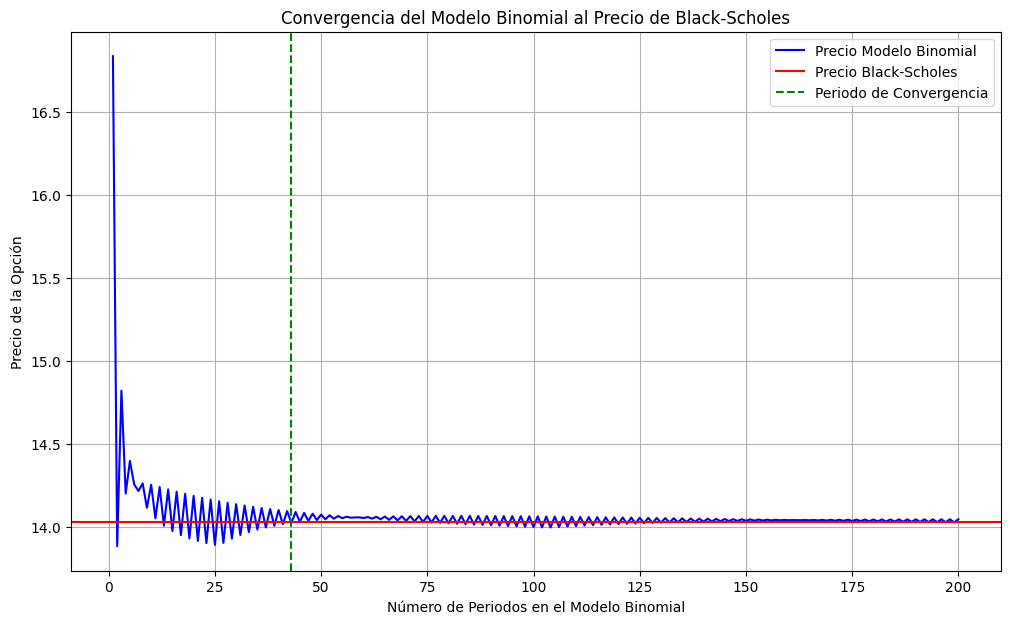

(43, 0.007748619635670195)

In [10]:
# Implementamos el modelo binomial para una opción de compraeuropea ahora más simplificado
def binomial_compra(S, K, T, r, sigma, N):
  delta_t = T / N # Duración de cada periodo
  u = np.exp(sigma * np.sqrt(delta_t)) # Factor de subida
  d = 1 / u # Factor de bajada
  p = (np.exp(r * delta_t) - d) / (u - d) # Probabilidad neutra al riesgo
  # Inicializamos el árbol de precios del activo
  arbol_precios = np.zeros([N + 1, N + 1])
  for i in range(N + 1):
    for j in range(i + 1):
        arbol_precios[j, i] = S * (u ** (i - j)) * (d ** j)
  # Inicializamos el árbol de opciones
  arbol_opciones = np.zeros([N + 1, N + 1])
  arbol_opciones[:, N] = np.maximum(arbol_precios[:, N] - K, 0)
# Beneficio en el vencimiento
# Retrocedemos en el árbol para valorar la opción
  for i in range(N - 1, -1, -1):
    for j in range(i + 1):
        arbol_opciones[j, i] = np.exp(-r * delta_t) * (p * arbol_opciones[j, i + 1] + (1 - p) * arbol_opciones[j + 1, i + 1])
  return arbol_opciones[0, 0] # Valor de la opción en el tiempo 0

# Parámetros de entrada
precio_spot = 178 # Precio actual del activo
precio_ejercicio = 185 # Precio de ejercicio
tiempo_vencimiento = 4 / 12 # Tiempo hasta el vencimiento en años (4 meses)
tasa_interes = 0.12 # Tasa de interés libre de riesgo anual
volatilidad = 0.34 # Volatilidad anual

# Valor de Black-Scholes para comparación
precio_bs = black_scholes_compra(precio_spot, precio_ejercicio,tiempo_vencimiento, tasa_interes, volatilidad)

# Iteramos sobre diferentes números de periodos para observar la convergencia
max_periodos = 200
precios_binomiales = []
diferencias = []

for N in range(1, max_periodos + 1):
    precio_bin = binomial_compra(precio_spot, precio_ejercicio,tiempo_vencimiento, tasa_interes, volatilidad, N)
    precios_binomiales.append(precio_bin)
    diferencias.append(abs(precio_bin - precio_bs))

# Encontramos el número de periodos donde la diferencia es menor que 0.01 por primera vez
periodos_convergencia = next(i for i, diff in enumerate(diferencias) if diff < 0.01) + 1
diferencia_convergencia = diferencias[periodos_convergencia - 1]

# Graficamos la convergencia del modelo binomial al precio de Black-Scholes

plt.figure(figsize=(12, 7))
plt.plot(range(1, max_periodos + 1), precios_binomiales, label='Precio Modelo Binomial', color='blue')
plt.axhline(y=precio_bs, color='red', label='Precio Black-Scholes')
plt.axvline(x=periodos_convergencia, color='green', linestyle='--', label='Periodo de Convergencia')
plt.title('Convergencia del Modelo Binomial al Precio de Black-Scholes')
plt.xlabel('Número de Periodos en el Modelo Binomial')
plt.ylabel('Precio de la Opción')
plt.legend()
plt.grid(True)
plt.show()
(periodos_convergencia, diferencia_convergencia)